# Load Data and Libraries

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv('data.csv')
# print 10 tuples from the top
df.head(10)

,Purchase,SUS,Duration,Gender,ASR_Error,Intent_Error,Unnamed: 6
0,1,84,254,0,3,2,NaN
1,0,58,247,0,6,9,NaN
2,0,56,125,1,6,8,NaN
3,0,55,22,0,11,7,NaN
4,1,95,262,0,2,3,NaN
5,0,71,113,1,8,9,NaN
6,0,76,91,1,6,3,NaN
7,0,64,46,0,6,11,NaN
8,0,56,132,0,9,9,NaN
9,0,96,190,0,11,4,NaN


In [3]:
# fill missing values with 0
df = df.fillna(0)

# drop that end column
df.drop('Unnamed: 6', axis=1, inplace=True)
df.isna().sum()

Purchase        0
SUS             0
Duration        0
Gender          0
ASR_Error       0
Intent_Error    0
dtype: int64

# Computing Pair-Wise Correlations

In [4]:
# none of our variables are categorical so we won't need to encode them
# compute pair-wise correlations... method is pearson (standard correlation coeff.)
df.corr(method='pearson')['SUS'].sort_values()

Intent_Error   -0.693675
ASR_Error      -0.662405
Duration       -0.006631
Gender          0.111523
Purchase        0.661931
SUS             1.000000
Name: SUS, dtype: float64

> there seems to be a moderate correlation between Intent_Error, ASR_Error, and Purchase and SUS score.

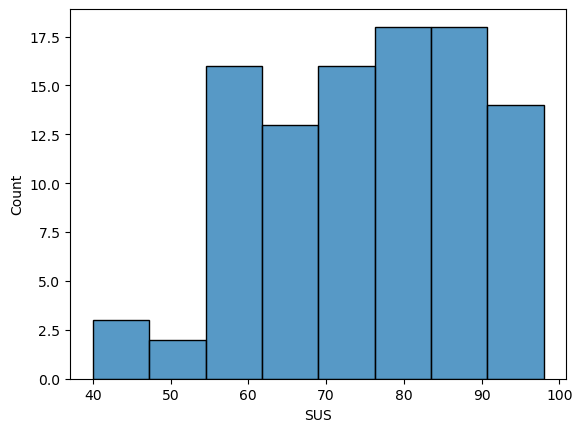

In [5]:
# seaborn to graph a histogram of SUS values
sns.histplot(data=df['SUS'])
plt.show() 

C:\Users\nick-d\AppData\Local\Temp\ipykernel_15472\2210279110.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['Purchase'] == 1]['SUS'], color='c') # yes
C:\Users\nick-d\AppData\Local\Temp\ipykernel_15472\2210279110.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['Pur

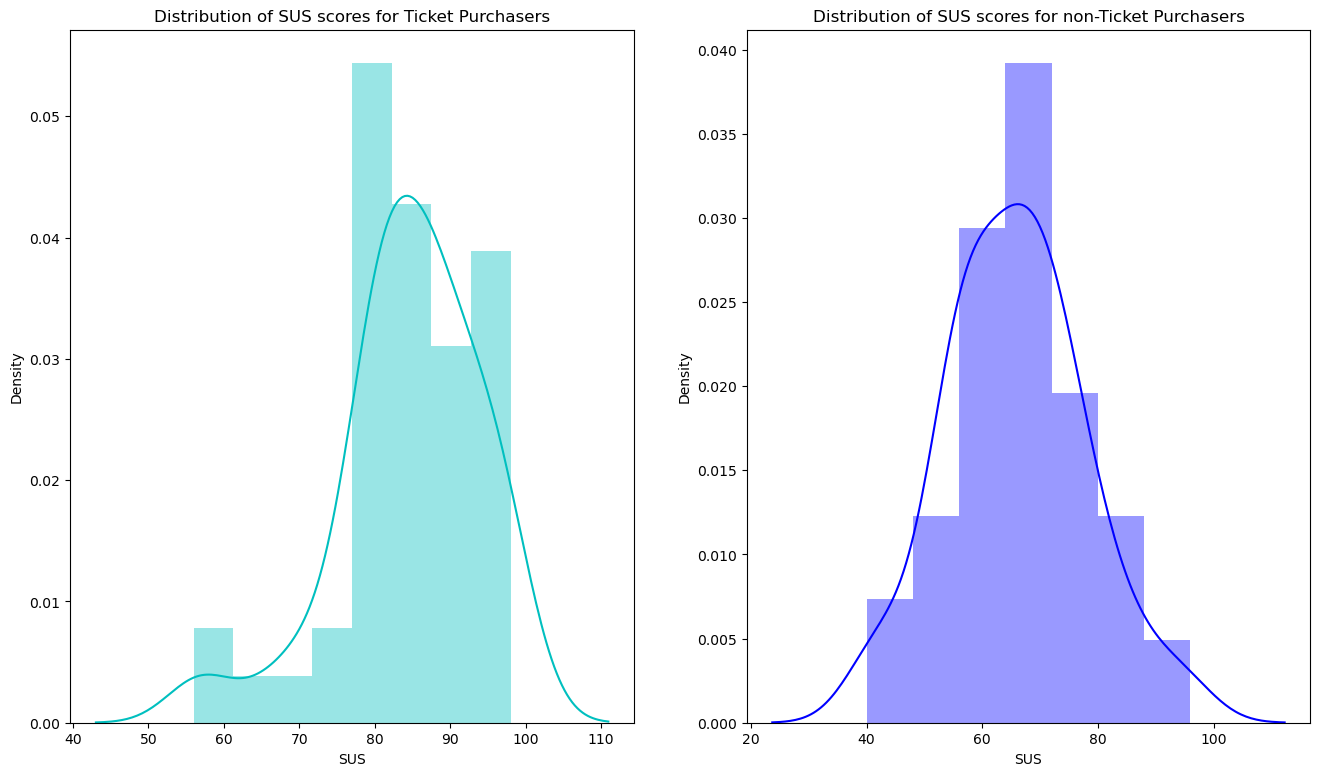

In [6]:
# plot SUS distributions for custeomrs who bought a ticket using Siri and those who didn't
fig = plt.figure(figsize=(16,9))

# first subplot
sp1 = fig.add_subplot(121) 
sns.distplot(df.loc[df['Purchase'] == 1]['SUS'], color='c') # yes
sp1.set_title('Distribution of SUS scores for Ticket Purchasers')

# second subplot
sp2 = fig.add_subplot(122)
sns.distplot(df.loc[df['Purchase'] == 0]['SUS'], color='b') # yes
sp2.set_title('Distribution of SUS scores for non-Ticket Purchasers')

# graph
plt.show()

In [7]:
import statsmodels.api as sm

dependent= df['SUS'] # dependent variable (output)
independent = df.drop(columns='SUS') # independent variables (input)

independent = sm.add_constant(independent) # add constant to independent variables

# ordinary least squares regression model
model = sm.OLS(dependent, independent).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                    SUS   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     27.39
Date:                Tue, 14 Feb 2023   Prob (F-statistic):           5.25e-17
Time:                        20:14:52   Log-Likelihood:                -362.39
No. Observations:                 100   AIC:                             736.8
Df Residuals:                      94   BIC:                             752.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           93.0282      5.541     16.788   

In [8]:
# import regression analysis libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [9]:
# prepare dependent and independent variables
dependent = df['SUS']
independent = df.drop(columns='SUS')

# call train_test_split to split into train & test
x_train, x_test, y_train, y_test = train_test_split(independent, dependent)

In [10]:
# fit linear regression model using training data
lr_model = LinearRegression().fit(x_train, y_train)

# predict using the model we created above
y_train_pr = lr_model.predict(x_train)
y_test_pr = lr_model.predict(x_test)

print("R square score of linear regression model: ", lr_model.score(x_test, y_test))

R square score of linear regression model:  0.47214791826248426


# Questions

**1. Show the statistical results of your trained regression model.**

The R-squared score of our trained linear regression model is above. R-squared is basically how close the data fits to the regression line. Typically the higher it is, the better the model fits your data. 

**2. What features are significant? Which features are insignificant?**

The features that are significant are 'ASR_Error', and 'Intent_Error'. 'Purchase' and 'Gender' features have Pearson Correlation Coefficients of 1.3412 and 0.8367, respectively. This means that they have strong positive correlation with SUS values: when one goes up, the other does too. However, they have p-values much greater than the normal threshold of p < 0.05, so they are not statistically significant to influence SUS scores. 'ASR_Error' and 'Intent_Error' have Pearson Correlation Coefficients of -1.4254 and -2.0092, meaning that they have strong negative correlation with SUS values: when they rise, SUS score falls. These two features have p-values < 0.05, meaning that these features statistically significant to influence SUS scores.

The insignficant features are 'Duration', having a |coef| of 0.0002, meaning none/very weak correlation. However, 'Duration' also has a p-value > 0.05, so we cannot rely on the Pearson's coefficient alone.

**3. Were the results what you expected? Explain why or why not, for each feature.**

The results do make sense. The SUS score is a scale that scores a product/service's usability. The user scores 10 questions with responses from strongly agree -> strongly disagree. It is expected that those who had a lot of situations where Siri failed to recognize their speech/classify their intention would be upset and rank the usability of the product lower. It also makes sense that 'Purchase', 'Gender', and 'Duration' would be insignificant as none of these features actually has a correlation with SUS scores. People who make ticket purchases could be either satisfied/unsatisfied with the usability. Also, the user's gender and  total duration of dialogue between Siri and the user does not imply anything about Siri's usability, any gender and range of duration can be satisfied/unsatisfied with the usability. 

**4. What does the model suggest is the most infleuntial factor on SUS? Explain what tells you this is the most influential factor statistically.**

The model suggests that the most influential factor on SUS is 'Intent_Error'. The model suggests that this is the most influential factor on SUS because it has the highest Pearson Correlation Coefficient absolute value and the lowest p-value. This means that it has the strongest influence on the dependent variable 'SUS' and the p-value of 0.00 explains that it is absolutely certain that it has an influence on 'SUS' score.

**5. What are the potential reasons for these factor(s) being significant predictors of SUS?**

The potential reason for 'ASR_Error' and 'Intent_Error' being significant predictors of SUS would be that users experiencing error with Siri would be more likely to give Siri a low usability score. ASR_Error is the number of time Siri fails to recognize the user's speech. People who experience this error a lot would give a low usability score, but those who never/seldomly experience it would give a higher score. Same for Intent_Error which is the number of time sthe system failed to classify the user's intention/speech act. The more times a user experiences the error, the lower the usability score, and vice-versa. 